In [1]:
import diffractio
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=[4,4]
matplotlib.rcParams['figure.dpi']=125

number of processors: 16
total memory        : 15.9 Gb
available memory    : 33 %
max frequency       : 2904 GHz


In [2]:
wavelength=0.805*um
k=2*np.pi/wavelength
size=1*mm #size of the canvas

x=np.linspace(-1*size, size, 1024*3)
y=np.linspace(-1*size, size, 1024*3)

In [3]:
#Plane wave source => u0
u0 = Scalar_source_XY(x, y, wavelength=wavelength, info='u0')
u0.plane_wave(phi=0 * degrees, theta=0 * degrees)

100.0
9


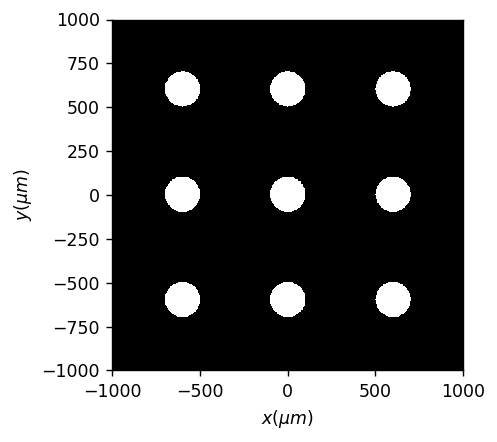

In [4]:
#Array generator plane
a = 100*um #radius of the bright traps
print(a)

sq1=Scalar_mask_XY(x, y, wavelength)
sq1.square(
    r0=(0* um, 0 * um),
    size=(2000 * um, 2000 * um),
    angle=0 * degrees)

#sq2=Scalar_mask_XY(x, y, wavelength)
#sq2.square(
#    r0=(0* um, 0 * um),
#    size=(1800 * um, 1800 * um),
#    angle=0 * degrees)

#sq=sq1-sq2
#sq.draw(kind='intensity', filename='brightArray_mask.png')

s = Scalar_mask_XY(x, y, wavelength)
s.circle(
    r0=(0 * um, 0 * um), radius=(a, a), angle=0 * degrees)

t0= Scalar_mask_XY(x, y, wavelength)

num_points = t0.insert_array_masks(
    t1=s,
    space=[600 * um, 600 * um],
    margin=400 * um,
    angle=0 * degrees)

t0.draw(kind='intensity', filename='brightArray_mask.png')
print(num_points)

In [5]:
#Field propagating through array gen => u1
u1=t0*u0
#u1.cut_resample(
#    x_limits=(-1000 * um, 1000 * um),
#    y_limits=(-1000 * um, 1000 * um),
#    num_points=(512, 512),
#    new_field=False)

#u1.draw(kind='intensity', logarithm=False,has_colorbar='vertical');


10000.0


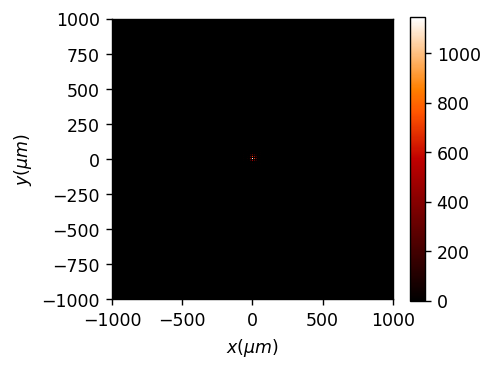

In [6]:
#Field at first lens (f=f1) => u2
f1 = 100*a
print(f1)
u2 = u1.RS(z=f1, new_field=True)

#First lens (f=f1) => t1
t1 = Scalar_mask_XY(x, y, wavelength)
t1.lens(
    r0=(0 * um, 0 * um),
    radius=(-1 * size, 1 * size),
    focal=(f1, f1),
    angle=0 * degrees)


#Field propagating through first lens => u3
u3=t1*u2

#Field in the fourier plane => u4
u4 = u3.RS(z=f1, new_field=True)
#u4.cut_resample(
#    x_limits=(-200 * um, 200 * um),
#    y_limits=(-200 * um, 200 * um),
#    num_points=(512, 512),
#    new_field=False)
u4.draw(kind='intensity', logarithm=False,has_colorbar='vertical');

49.09163663333984


((<matplotlib.image.AxesImage at 0x18d1b92adf0>,
  <matplotlib.image.AxesImage at 0x18d1b9a15b0>),
 None,
 None)

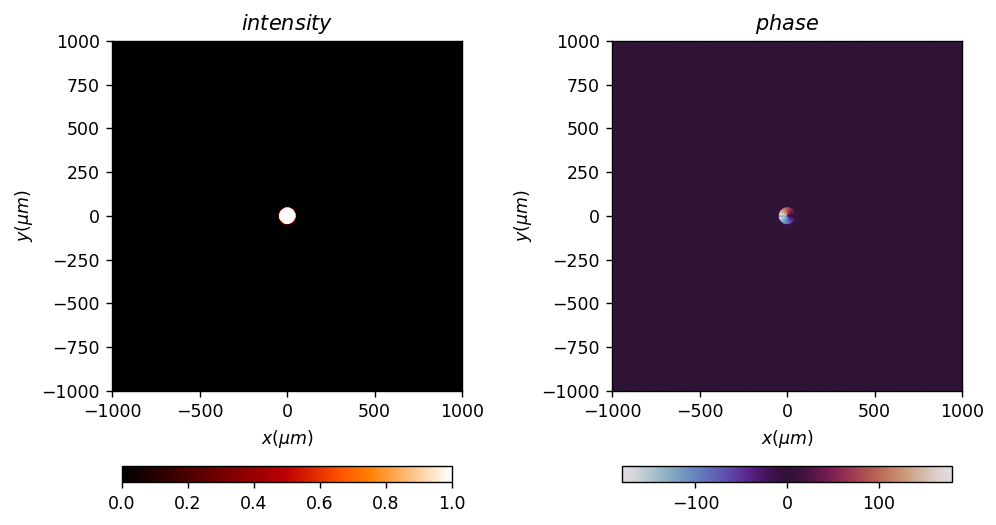

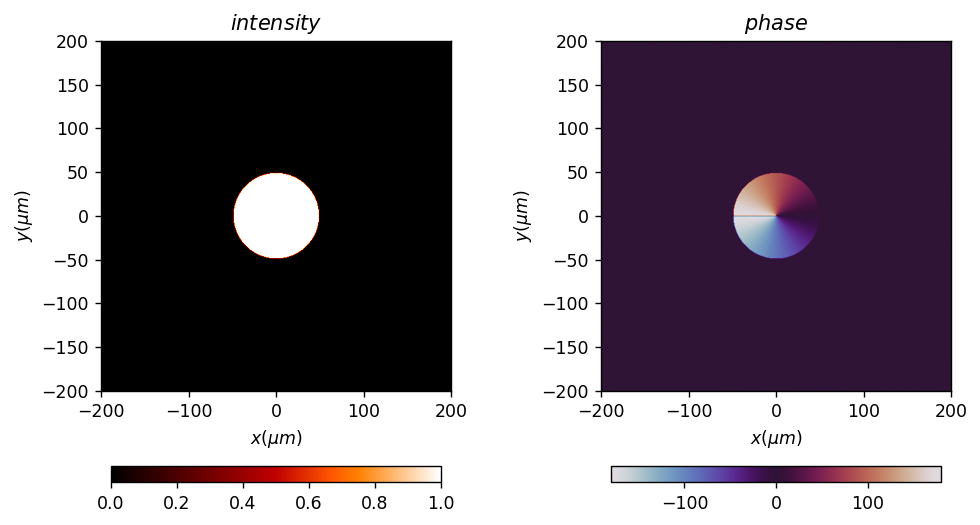

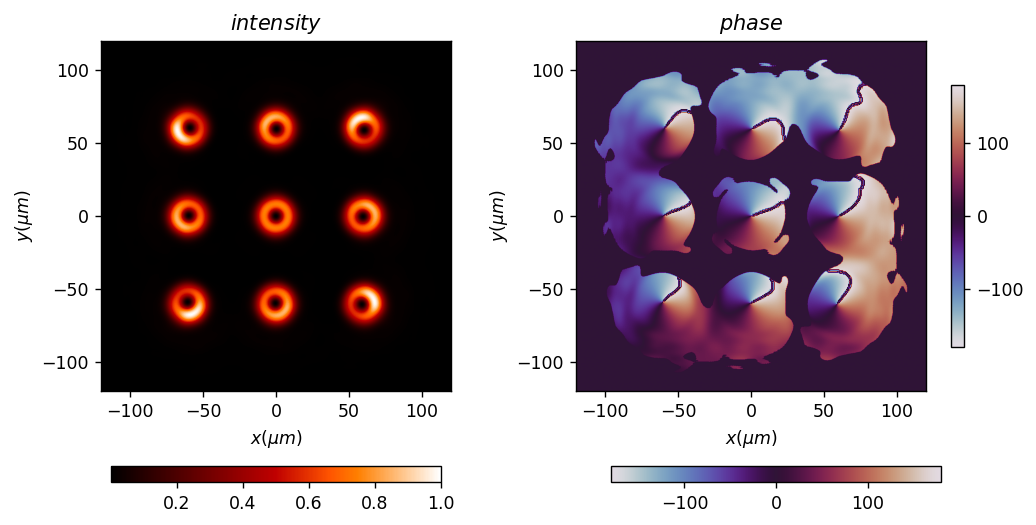

In [7]:
b = f1*3.8317/(a*k) #radius of slit in fourier plane
print(b)

# #Fourier plane filter
# t2 = Scalar_mask_XY(x, y, wavelength)
# t2.circle(
#     r0=(0 * um, 0 * um), radius=(b, b), angle=0 * degrees)
# t2.draw(title='Fourier plane filter')


fn1="np.zeros_like(self.X,dtype=float)"
# fn2="np.where(np.angle(self.X + self.Y*1j)<0, 2*np.pi + np.angle(self.X + self.Y*1j), np.angle(self.X + self.Y*1j))"
# fn2a = "np.arctan2(self.X + self.Y*1j)/(2*np.pi)"
# fn2b = "(np.angle(self.X + self.Y*1j) - 2*np.pi)/(2*np.pi)"

fn2 = "(np.arctan2(self.Y,self.X))/((1.5-1)*7.8051991393535225)"

# t2a = Scalar_mask_XY(x, y, wavelength)
# t2a.mask_from_function(
#     r0=(0 * um, 0 * um),
#     index=1.5,
#     f1 = fn1,
#     f2 = fn2a,
#     v_globals=None,
#     radius=(b,b),
#     mask=True)
# t2a.draw(kind='field')


t2 = Scalar_mask_XY(x, y, wavelength)
t2.mask_from_function(
    r0=(0 * um, 0 * um),
    index=1.5,
    f1 = fn1,
    f2 = fn2,
    v_globals=None,
    radius=(b,b),
    mask=True)
t2.draw(kind='field')



t2d = Scalar_mask_XY(x/5, y/5, wavelength)
t2d.mask_from_function(
    r0=(0 * um, 0 * um),
    index=1.5,
    f1 = fn1,
    f2 = fn2,
    v_globals=None,
    radius=(b,b),
    mask=True)
t2d.draw(kind='field')


#Field passing through the fourier plane => u5
u5=t2*u4

f2=f1/10
#Field at the second lens (f=f2)
u6 = u5.RS(z=f2, new_field=True)

#Second lens (f=f2) => t3
t3 = Scalar_mask_XY(x, y, wavelength)
t3.lens(
    r0=(0 * um, 0 * um),
    radius=(-1 * size, 1 * size),
    focal=(f2, f2),
    angle=0 * degrees)

#Field propagating through second lens => u7
u7=t3*u6

#Field in the image plane =>u8
u8 = u7.RS(z=f2, new_field=True)
u8.cut_resample(
    x_limits=(-120 * um, 120 * um),
    y_limits=(-120 * um, 120 * um),
    num_points=(1024, 1024),
    new_field=False)
u8.normalize()
u8.draw(kind='field', logarithm=False, has_colorbar='vertical', filename='brightArray_imagePlane.png')

#x_max, y_max = u8.search_focus(verbose=True)
#u8.draw_profile(point1=[-150*um,x_max], point2=[150*um, x_max], npixels=512,
#                kind='intensity', order=2);